In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,2:3] #Glucose
X2 = dataset[:,7:8] #Resistin
X3 = dataset[:,0:1] #Age
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
merge_layer (Concatenate)       (None, 3)            0           input_layer_X1[0][0]             
                                                                 input_layer_X2[0][0]       

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 9ms/step - loss: 0.7058 - acc: 0.5217 - auc_1: 0.4886 - val_loss: 0.6747 - val_acc: 0.6250 - val_auc_1: 0.6786
Epoch 2/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6831 - acc: 0.5870 - auc_1: 0.5952 - val_loss: 0.6432 - val_acc: 0.6250 - val_auc_1: 0.7321
Epoch 3/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6708 - acc: 0.5978 - auc_1: 0.6264 - val_loss: 0.6196 - val_acc: 0.7500 - val_auc_1: 0.7429
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6503 - acc: 0.6196 - auc_1: 0.6795 - val_loss: 0.5956 - val_acc: 0.7917 - val_auc_1: 0.7571
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6272 - acc: 0.6196 - auc_1: 0.7126 - val_loss: 0.5664 - val_acc: 0.7500 - val_auc_1: 0.7857
Epoch 6/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6127 - acc: 0.6739 - auc_1: 0.7338 - val_loss:

92/92 [==============================] - 0s 3ms/step - loss: 0.5489 - acc: 0.7065 - auc_1: 0.7919 - val_loss: 0.5329 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5397 - acc: 0.7174 - auc_1: 0.8050 - val_loss: 0.4897 - val_acc: 0.8333 - val_auc_1: 0.9000
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5576 - acc: 0.7174 - auc_1: 0.7836 - val_loss: 0.5151 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5514 - acc: 0.7174 - auc_1: 0.7826 - val_loss: 0.5689 - val_acc: 0.7083 - val_auc_1: 0.8929
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5541 - acc: 0.6848 - auc_1: 0.7890 - val_loss: 0.5266 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch 54/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5518 - acc: 0.7391 - auc_1: 0.7933 - val_loss: 0.5177 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch

92/92 [==============================] - 0s 5ms/step - loss: 0.5487 - acc: 0.7174 - auc_1: 0.7912 - val_loss: 0.4950 - val_acc: 0.8333 - val_auc_1: 0.9000
Epoch 98/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5504 - acc: 0.7391 - auc_1: 0.7876 - val_loss: 0.4989 - val_acc: 0.7500 - val_auc_1: 0.9000
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5470 - acc: 0.7174 - auc_1: 0.7910 - val_loss: 0.5180 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 100/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5449 - acc: 0.7283 - auc_1: 0.7938 - val_loss: 0.5158 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 101/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5463 - acc: 0.7174 - auc_1: 0.7943 - val_loss: 0.5077 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 102/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5500 - acc: 0.7174 - auc_1: 0.7871 - val_loss: 0.5628 - val_acc: 0.7083 - val_auc_1: 0.8929
Ep

92/92 [==============================] - 0s 3ms/step - loss: 0.5478 - acc: 0.7174 - auc_1: 0.7902 - val_loss: 0.4970 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch 146/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5424 - acc: 0.7283 - auc_1: 0.7964 - val_loss: 0.4546 - val_acc: 0.8333 - val_auc_1: 0.9036
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5402 - acc: 0.7500 - auc_1: 0.8048 - val_loss: 0.4832 - val_acc: 0.7500 - val_auc_1: 0.8964
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5439 - acc: 0.7174 - auc_1: 0.7955 - val_loss: 0.4621 - val_acc: 0.7500 - val_auc_1: 0.9000
Epoch 149/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5447 - acc: 0.7283 - auc_1: 0.7888 - val_loss: 0.4416 - val_acc: 0.8333 - val_auc_1: 0.9071
Epoch 150/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5454 - acc: 0.7283 - auc_1: 0.7910 - val_loss: 0.4571 - val_acc: 0.7500 - val_auc_1: 0.9036


Epoch 193/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5264 - acc: 0.7174 - auc_1: 0.8083 - val_loss: 0.3947 - val_acc: 0.8750 - val_auc_1: 0.9214
Epoch 194/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5209 - acc: 0.7500 - auc_1: 0.8160 - val_loss: 0.4837 - val_acc: 0.7500 - val_auc_1: 0.8821
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5272 - acc: 0.7283 - auc_1: 0.8124 - val_loss: 0.4072 - val_acc: 0.8333 - val_auc_1: 0.9071
Epoch 196/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5329 - acc: 0.7283 - auc_1: 0.8026 - val_loss: 0.4343 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 197/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5313 - acc: 0.7717 - auc_1: 0.8031 - val_loss: 0.3974 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5250 - acc: 0.7826 - auc_1: 0.8083 - val_loss: 0.3995 - val_acc: 0.8750 - val_

92/92 [==============================] - 1s 6ms/step - loss: 0.4996 - acc: 0.7609 - auc_1: 0.8376 - val_loss: 0.4159 - val_acc: 0.8333 - val_auc_1: 0.9000
Epoch 242/700
92/92 [==============================] - 0s 5ms/step - loss: 0.5060 - acc: 0.7283 - auc_1: 0.8212 - val_loss: 0.3867 - val_acc: 0.8333 - val_auc_1: 0.9214
Epoch 243/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5007 - acc: 0.7717 - auc_1: 0.8267 - val_loss: 0.3882 - val_acc: 0.8750 - val_auc_1: 0.9143
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4940 - acc: 0.7717 - auc_1: 0.8452 - val_loss: 0.4012 - val_acc: 0.8750 - val_auc_1: 0.9000
Epoch 245/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4953 - acc: 0.7826 - auc_1: 0.8305 - val_loss: 0.3868 - val_acc: 0.8750 - val_auc_1: 0.9071
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5029 - acc: 0.7609 - auc_1: 0.8350 - val_loss: 0.4061 - val_acc: 0.8333 - val_auc_1: 0.9071


92/92 [==============================] - 0s 4ms/step - loss: 0.4346 - acc: 0.8370 - auc_1: 0.8643 - val_loss: 0.3552 - val_acc: 0.9167 - val_auc_1: 0.9143
Epoch 290/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4430 - acc: 0.8043 - auc_1: 0.8619 - val_loss: 0.3989 - val_acc: 0.8333 - val_auc_1: 0.8929
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4288 - acc: 0.8478 - auc_1: 0.8640 - val_loss: 0.3570 - val_acc: 0.9167 - val_auc_1: 0.9143
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4331 - acc: 0.8478 - auc_1: 0.8626 - val_loss: 0.3781 - val_acc: 0.9167 - val_auc_1: 0.9036
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4243 - acc: 0.8370 - auc_1: 0.8733 - val_loss: 0.4053 - val_acc: 0.7917 - val_auc_1: 0.8964
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4320 - acc: 0.8261 - auc_1: 0.8650 - val_loss: 0.3759 - val_acc: 0.9167 - val_auc_1: 0.9071


92/92 [==============================] - 0s 4ms/step - loss: 0.3795 - acc: 0.8478 - auc_1: 0.8981 - val_loss: 0.4118 - val_acc: 0.9167 - val_auc_1: 0.8857
Epoch 338/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3836 - acc: 0.8261 - auc_1: 0.8900 - val_loss: 0.3658 - val_acc: 0.9167 - val_auc_1: 0.9071
Epoch 339/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3715 - acc: 0.8370 - auc_1: 0.8936 - val_loss: 0.3955 - val_acc: 0.8750 - val_auc_1: 0.8964
Epoch 340/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3789 - acc: 0.8261 - auc_1: 0.8988 - val_loss: 0.4149 - val_acc: 0.9167 - val_auc_1: 0.8857
Epoch 341/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3648 - acc: 0.8370 - auc_1: 0.9033 - val_loss: 0.4693 - val_acc: 0.8750 - val_auc_1: 0.8786
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3804 - acc: 0.8370 - auc_1: 0.9010 - val_loss: 0.4348 - val_acc: 0.9167 - val_auc_1: 0.8821


92/92 [==============================] - 0s 4ms/step - loss: 0.3447 - acc: 0.8261 - auc_1: 0.9231 - val_loss: 0.4419 - val_acc: 0.9167 - val_auc_1: 0.8750
Epoch 386/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3460 - acc: 0.8370 - auc_1: 0.9198 - val_loss: 0.5548 - val_acc: 0.8750 - val_auc_1: 0.8464
Epoch 387/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3487 - acc: 0.8261 - auc_1: 0.9190 - val_loss: 0.4945 - val_acc: 0.9167 - val_auc_1: 0.8714
Epoch 388/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3363 - acc: 0.8370 - auc_1: 0.9248 - val_loss: 0.4746 - val_acc: 0.9167 - val_auc_1: 0.8679
Epoch 389/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3391 - acc: 0.8370 - auc_1: 0.9226 - val_loss: 0.4221 - val_acc: 0.9167 - val_auc_1: 0.8821
Epoch 390/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3404 - acc: 0.8370 - auc_1: 0.9250 - val_loss: 0.5314 - val_acc: 0.8750 - val_auc_1: 0.8643


92/92 [==============================] - 1s 7ms/step - loss: 0.3308 - acc: 0.8043 - auc_1: 0.9240 - val_loss: 0.6263 - val_acc: 0.8750 - val_auc_1: 0.8321
Epoch 434/700
92/92 [==============================] - 1s 7ms/step - loss: 0.3112 - acc: 0.8478 - auc_1: 0.9350 - val_loss: 0.6508 - val_acc: 0.8750 - val_auc_1: 0.8214
Epoch 435/700
92/92 [==============================] - 1s 8ms/step - loss: 0.3177 - acc: 0.8370 - auc_1: 0.9326 - val_loss: 0.5374 - val_acc: 0.8750 - val_auc_1: 0.8679
Epoch 436/700
92/92 [==============================] - 1s 7ms/step - loss: 0.3249 - acc: 0.8370 - auc_1: 0.9248 - val_loss: 0.4911 - val_acc: 0.8750 - val_auc_1: 0.8750
Epoch 437/700
92/92 [==============================] - 1s 7ms/step - loss: 0.3294 - acc: 0.8261 - auc_1: 0.9250 - val_loss: 0.4383 - val_acc: 0.8750 - val_auc_1: 0.8821
Epoch 438/700
92/92 [==============================] - 1s 7ms/step - loss: 0.3184 - acc: 0.8370 - auc_1: 0.9298 - val_loss: 0.5832 - val_acc: 0.8750 - val_auc_1: 0.8393


92/92 [==============================] - 1s 7ms/step - loss: 0.2881 - acc: 0.8478 - auc_1: 0.9355 - val_loss: 0.5946 - val_acc: 0.9167 - val_auc_1: 0.8536
Epoch 482/700
92/92 [==============================] - 1s 7ms/step - loss: 0.2965 - acc: 0.8478 - auc_1: 0.9336 - val_loss: 0.6261 - val_acc: 0.8750 - val_auc_1: 0.8464
Epoch 483/700
92/92 [==============================] - 1s 7ms/step - loss: 0.2889 - acc: 0.8370 - auc_1: 0.9329 - val_loss: 0.6188 - val_acc: 0.9167 - val_auc_1: 0.8571
Epoch 484/700
92/92 [==============================] - 1s 7ms/step - loss: 0.2901 - acc: 0.8587 - auc_1: 0.9314 - val_loss: 0.5992 - val_acc: 0.9167 - val_auc_1: 0.8607
Epoch 485/700
92/92 [==============================] - 1s 7ms/step - loss: 0.2839 - acc: 0.8587 - auc_1: 0.9371 - val_loss: 0.5961 - val_acc: 0.9167 - val_auc_1: 0.8571
Epoch 486/700
92/92 [==============================] - 1s 7ms/step - loss: 0.2905 - acc: 0.8587 - auc_1: 0.9345 - val_loss: 0.5355 - val_acc: 0.9167 - val_auc_1: 0.8679


92/92 [==============================] - 0s 5ms/step - loss: 0.2511 - acc: 0.8804 - auc_1: 0.9429 - val_loss: 0.6289 - val_acc: 0.8750 - val_auc_1: 0.8429
Epoch 530/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2555 - acc: 0.8913 - auc_1: 0.9405 - val_loss: 0.6074 - val_acc: 0.8750 - val_auc_1: 0.8571
Epoch 531/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2509 - acc: 0.8804 - auc_1: 0.9450 - val_loss: 0.5806 - val_acc: 0.9167 - val_auc_1: 0.8643
Epoch 532/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2532 - acc: 0.8804 - auc_1: 0.9407 - val_loss: 0.5908 - val_acc: 0.9167 - val_auc_1: 0.8571
Epoch 533/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2478 - acc: 0.8913 - auc_1: 0.9426 - val_loss: 0.5992 - val_acc: 0.9167 - val_auc_1: 0.8643
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2444 - acc: 0.8804 - auc_1: 0.9433 - val_loss: 0.6582 - val_acc: 0.8750 - val_auc_1: 0.8286


92/92 [==============================] - 1s 6ms/step - loss: 0.2198 - acc: 0.9022 - auc_1: 0.9564 - val_loss: 0.6046 - val_acc: 0.9167 - val_auc_1: 0.8607
Epoch 578/700
92/92 [==============================] - 1s 6ms/step - loss: 0.2353 - acc: 0.8913 - auc_1: 0.9471 - val_loss: 0.6755 - val_acc: 0.8750 - val_auc_1: 0.8536
Epoch 579/700
92/92 [==============================] - 1s 6ms/step - loss: 0.2250 - acc: 0.8913 - auc_1: 0.9529 - val_loss: 0.6007 - val_acc: 0.8750 - val_auc_1: 0.8607
Epoch 580/700
92/92 [==============================] - 1s 5ms/step - loss: 0.2226 - acc: 0.8913 - auc_1: 0.9500 - val_loss: 0.5996 - val_acc: 0.9167 - val_auc_1: 0.8607
Epoch 581/700
92/92 [==============================] - 0s 5ms/step - loss: 0.2214 - acc: 0.9022 - auc_1: 0.9521 - val_loss: 0.6089 - val_acc: 0.9167 - val_auc_1: 0.8571
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2237 - acc: 0.9022 - auc_1: 0.9560 - val_loss: 0.6131 - val_acc: 0.9167 - val_auc_1: 0.8571


92/92 [==============================] - 0s 4ms/step - loss: 0.2051 - acc: 0.9130 - auc_1: 0.9619 - val_loss: 0.5935 - val_acc: 0.9167 - val_auc_1: 0.8607
Epoch 626/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1992 - acc: 0.9130 - auc_1: 0.9607 - val_loss: 0.6089 - val_acc: 0.9167 - val_auc_1: 0.8643
Epoch 627/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2018 - acc: 0.9130 - auc_1: 0.9605 - val_loss: 0.6163 - val_acc: 0.9167 - val_auc_1: 0.8679
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1997 - acc: 0.9130 - auc_1: 0.9612 - val_loss: 0.5982 - val_acc: 0.8750 - val_auc_1: 0.8607
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2070 - acc: 0.9022 - auc_1: 0.9550 - val_loss: 0.6362 - val_acc: 0.8750 - val_auc_1: 0.8500
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2033 - acc: 0.9022 - auc_1: 0.9602 - val_loss: 0.6397 - val_acc: 0.8333 - val_auc_1: 0.8536


92/92 [==============================] - 1s 6ms/step - loss: 0.1894 - acc: 0.9130 - auc_1: 0.9657 - val_loss: 0.6636 - val_acc: 0.9167 - val_auc_1: 0.8607
Epoch 674/700
92/92 [==============================] - 1s 6ms/step - loss: 0.1925 - acc: 0.9022 - auc_1: 0.9574 - val_loss: 0.6913 - val_acc: 0.9167 - val_auc_1: 0.8643
Epoch 675/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1892 - acc: 0.9130 - auc_1: 0.9648 - val_loss: 0.6812 - val_acc: 0.8333 - val_auc_1: 0.8536
Epoch 676/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1884 - acc: 0.9130 - auc_1: 0.9600 - val_loss: 0.6860 - val_acc: 0.8750 - val_auc_1: 0.8536
Epoch 677/700
92/92 [==============================] - 1s 6ms/step - loss: 0.1866 - acc: 0.9130 - auc_1: 0.9614 - val_loss: 0.6896 - val_acc: 0.8750 - val_auc_1: 0.8571
Epoch 678/700
92/92 [==============================] - 1s 6ms/step - loss: 0.1883 - acc: 0.9130 - auc_1: 0.9645 - val_loss: 0.6458 - val_acc: 0.9167 - val_auc_1: 0.8643


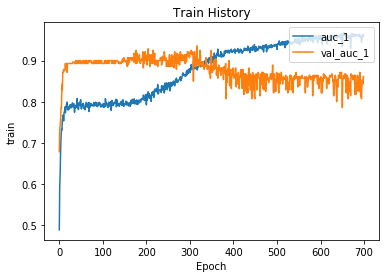

[array([[-0.7665543 ,  1.6949565 , -0.9752218 , -1.6656597 ,  0.41694558,
         0.66652155, -1.4355901 , -0.12813197, -1.3062295 ],
       [-2.0534494 , -0.06800532, -1.7611593 , -0.9239358 ,  3.2253935 ,
        -2.0234015 ,  0.33841687, -3.1555262 , -0.61679125],
       [ 0.3687241 ,  1.0285455 ,  1.0352566 ,  0.31617144, -0.1405706 ,
        -0.32448107,  1.205295  ,  0.5782798 , -0.96537113]],
      dtype=float32), array([ 0.23719083, -0.35164428, -0.0525511 ,  0.28587195, -0.06951464,
       -0.5411495 , -0.20297909, -0.01505815,  0.66327643], dtype=float32), array([[-2.4537961 , -0.3796367 ,  1.236367  ,  0.12472475,  1.3667927 ,
         1.3031837 , -1.0583955 ,  0.2948564 , -1.1717007 ],
       [ 0.75524545,  1.2201914 , -0.48518303,  3.1346774 ,  0.22735052,
        -0.15211938, -1.8272002 ,  1.118461  , -0.4520294 ],
       [-1.7014352 , -0.38263187,  1.8581884 ,  1.0345777 , -0.5297864 ,
         0.37611777, -3.562799  ,  0.6093481 , -0.8137099 ],
       [-3.114182  , -1.

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3])
print(predictions)

[[6.18502032e-04]
 [8.03850532e-01]
 [6.18842423e-01]
 [4.44622507e-04]
 [1.68911740e-01]
 [9.95315313e-01]
 [9.89920735e-01]
 [9.93735135e-01]
 [9.39953685e-01]
 [9.89432454e-01]
 [6.31002665e-01]
 [3.11504561e-03]
 [9.92452562e-01]
 [1.42658537e-03]
 [2.20090654e-02]
 [9.99606907e-01]
 [6.27306759e-01]
 [8.94591033e-01]
 [9.77248132e-01]
 [9.89022613e-01]
 [4.29200828e-02]
 [1.64881884e-03]
 [6.32839978e-01]
 [9.84705508e-01]
 [9.71577287e-01]
 [9.99732077e-01]
 [9.82678115e-01]
 [6.28857017e-01]
 [1.07109193e-02]
 [9.99474466e-01]
 [1.41196311e-01]
 [4.05778410e-03]
 [5.74579928e-04]
 [5.35215661e-02]
 [1.68727583e-03]
 [9.90169466e-01]
 [9.92224097e-01]
 [9.83190179e-01]
 [6.30373299e-01]
 [9.94540751e-01]
 [6.31082654e-01]
 [6.31120145e-01]
 [6.30987346e-01]
 [4.52008471e-02]
 [1.18671462e-03]
 [6.29100561e-01]
 [9.86630619e-01]
 [6.31161630e-01]
 [9.49412048e-01]
 [2.09295209e-02]
 [1.23290464e-01]
 [6.30632699e-01]
 [4.31839144e-03]
 [4.99752583e-03]
 [2.31494009e-03]
 [1.227122